In [51]:
import geopandas as gpd
df2019 = gpd.read_file('i15_Crop_Mapping_2019.shx')
df2019['MAIN_CROP'].value_counts()

V      69681
D12    40875
X      36044
C      29296
P3     23122
D13    19155
G6     18916
C5     15173
P1     14960
F16    14844
R1      9946
T18     9841
T16     9557
D14     7960
YP      7622
T30     7532
D5      6929
P6      5547
T4      4799
C6      4666
T15     4480
P4      4295
D16     4106
T20     3978
F1      3884
G2      3784
D10     3646
T19     3190
D3      2952
T9      1759
U       1609
D1      1598
T27     1512
T31     1368
C4      1235
T10     1140
C7      1089
T6      1042
F12     1019
F10     1014
D15      870
D8       818
F2       795
T21      721
D6       715
F11      586
R2       491
C8       489
C10      321
T12      128
C3        10
D          4
P          3
P7         3
T17        2
C2         1
Name: MAIN_CROP, dtype: int64

In [12]:
#df2019.MAIN_CROP.isin(lst) lst = ["P", "x"... ]

list2019=["P", "X", "C", "P3", "F16", "T18", 
         "YP", "T30", "P4", "D16", "T31", "F11",
         "C10", "D", "P7", "T17", "C2", "C3", "D8", "T12"]

df2019 = df2019[df2019.MAIN_CROP != 'P']
df2019 = df2019[df2019.MAIN_CROP != 'X']
df2019 = df2019[df2019.MAIN_CROP != 'C']
df2019 = df2019[df2019.MAIN_CROP != 'P3']
df2019 = df2019[df2019.MAIN_CROP != 'F16']
df2019 = df2019[df2019.MAIN_CROP != 'T18']
df2019 = df2019[df2019.MAIN_CROP != 'YP']
df2019 = df2019[df2019.MAIN_CROP != 'T30']
df2019 = df2019[df2019.MAIN_CROP != 'P4']
df2019 = df2019[df2019.MAIN_CROP != 'D16']
df2019 = df2019[df2019.MAIN_CROP != 'T31']
df2019 = df2019[df2019.MAIN_CROP != 'F11']
df2019 = df2019[df2019.MAIN_CROP != 'C10']
df2019 = df2019[df2019.MAIN_CROP != 'D']
df2019 = df2019[df2019.MAIN_CROP != 'P7']
df2019 = df2019[df2019.MAIN_CROP != 'T17']
df2019 = df2019[df2019.MAIN_CROP != 'C2']
df2019 = df2019[df2019.MAIN_CROP != 'C3'] 
df2019 = df2019[df2019.MAIN_CROP != 'D8'] 
df2019 = df2019[df2019.MAIN_CROP != 'T12'] 

df2019

,OBJECTID,UniqueID,DWR_REVISE,SYMB_CLASS,MULTIUSE,CLASS1,SUBCLASS1,SPECOND1,IRR_TYP1PA,IRR_TYP1PB,...,EMRG_CROP,REGION,ACRES,COUNTY,LIQ_REPORT,MAIN_CROP,MAIN_CROP_,Shape__Are,Shape__Len,geometry
0,1,1700436,*,V,S,**,**,*,*,*,...,****,NRO,6.057928e+00,Lake,V **** **** ****,V,NaN,4.062564e+04,1.005432e+03,"POLYGON Z ((-13677596.411 4718918.436 0.000, -..."
1,2,1700437,*,D,S,**,**,*,*,*,...,****,NRO,7.200428e+00,Lake,D6 **** **** ****,D6,NaN,4.840209e+04,1.082040e+03,"POLYGON Z ((-13685944.649 4731044.473 0.000, -..."
2,3,1700438,*,D,S,**,**,*,*,*,...,****,NRO,3.705646e+00,Lake,D6 **** **** ****,D6,NaN,2.487225e+04,6.677903e+02,"POLYGON Z ((-13678860.423 4723270.145 0.000, -..."
3,4,1700439,*,V,S,**,**,*,*,*,...,****,NRO,2.535251e+01,Lake,V **** **** ****,V,NaN,1.695452e+05,1.993146e+03,"POLYGON Z ((-13653397.845 4704721.672 0.000, -..."
4,5,1700440,*,D,S,**,**,*,*,*,...,****,NRO,3.283275e+00,Lake,D13 **** **** ****,D13,NaN,2.200933e+04,6.496347e+02,"POLYGON Z ((-13677863.892 4716620.397 0.000, -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411117,411118,6001063,b,U,S,**,**,*,*,*,...,****,****,1.008736e+03,****,U **** **** ****,U,NaN,6.536435e+06,2.925780e+04,"POLYGON Z ((-13525833.024 4542203.141 0.000, -..."
411118,411119,6001252,b,U,S,**,**,*,*,*,...,****,****,8.292024e+03,****,U **** **** ****,U,NaN,5.494904e+07,8.920363e+04,"POLYGON Z ((-13555507.922 4661092.152 0.000, -..."
411119,411120,6001117,b,U,S,**,**,*,*,*,...,****,****,3.351937e+04,****,U **** **** ****,U,NaN,2.187077e+08,3.626375e+05,MULTIPOLYGON Z (((-13568678.594 4584948.614 0....
411120,411121,6000792,b,U,S,**,**,*,*,*,...,****,****,1.457165e+06,****,U **** **** ****,U,NaN,8.595648e+09,4.979442e+06,MULTIPOLYGON Z (((-13109729.740 3997099.781 0....


In [52]:
df2019 = df2019.replace({
    'V': 'Grapes',
    'D12':'Almonds',
    'D13':'Walnuts',
    'G6':'Miscellaneous Grain and Hay',
    'C5':'Avocados',
    'P1':'Alfalfa and Alfalfa Mixtures',
    'R1':'Rice',
    'T16':'Flowers, Nursery and Christmas Tree Farms',
    'D14':'Pistachios',
    'D5':'Peaches/Nectarines',
    'P6':'Miscellaneous Grasses',
    'T4':'Cole Crops',
    'C6':'Olives',
    'T15':'Tomatoes',
    'T20':'Strawberries',
    'F1':'Cotton',
    'G2':'Wheat',
    'D10':'Miscellaneous Deciduous',
    'T19':'Bush Berries',
    'D3':'Cherries',
    'T9':'Melons, Squash and Cucumbers',
    'U':'Urban',
    'D1':'Apples',
    'T27':'Greenhouse',
    'C4':'Dates',
    'T10':'Onions and Garlic',
    'C7':'Miscellaneous Subtropical Fruits',
    'T6':'Carrots',
    'F12':'Sunflowers',
    'F10':'Beans (Dry)',
    'D15':'Pomegranates',
    'F2':'Safflower',
    'T21':'Peppers',
    'D6':'Pears',
    'R2':'Wild Rice',
    'C8':'Kiwis',
  }
)
df2019

,OBJECTID,UniqueID,DWR_REVISE,SYMB_CLASS,MULTIUSE,CLASS1,SUBCLASS1,SPECOND1,IRR_TYP1PA,IRR_TYP1PB,...,EMRG_CROP,REGION,ACRES,COUNTY,LIQ_REPORT,MAIN_CROP,MAIN_CROP_,Shape__Are,Shape__Len,geometry
0,1,1700436,*,Grapes,S,**,**,*,*,*,...,****,NRO,6.057928e+00,Lake,V **** **** ****,Grapes,NaN,4.062564e+04,1.005432e+03,"POLYGON Z ((-13677596.411 4718918.436 0.000, -..."
1,2,1700437,*,D,S,**,**,*,*,*,...,****,NRO,7.200428e+00,Lake,D6 **** **** ****,Pears,NaN,4.840209e+04,1.082040e+03,"POLYGON Z ((-13685944.649 4731044.473 0.000, -..."
2,3,1700438,*,D,S,**,**,*,*,*,...,****,NRO,3.705646e+00,Lake,D6 **** **** ****,Pears,NaN,2.487225e+04,6.677903e+02,"POLYGON Z ((-13678860.423 4723270.145 0.000, -..."
3,4,1700439,*,Grapes,S,**,**,*,*,*,...,****,NRO,2.535251e+01,Lake,V **** **** ****,Grapes,NaN,1.695452e+05,1.993146e+03,"POLYGON Z ((-13653397.845 4704721.672 0.000, -..."
4,5,1700440,*,D,S,**,**,*,*,*,...,****,NRO,3.283275e+00,Lake,D13 **** **** ****,Walnuts,NaN,2.200933e+04,6.496347e+02,"POLYGON Z ((-13677863.892 4716620.397 0.000, -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411117,411118,6001063,b,Urban,S,**,**,*,*,*,...,****,****,1.008736e+03,****,U **** **** ****,Urban,NaN,6.536435e+06,2.925780e+04,"POLYGON Z ((-13525833.024 4542203.141 0.000, -..."
411118,411119,6001252,b,Urban,S,**,**,*,*,*,...,****,****,8.292024e+03,****,U **** **** ****,Urban,NaN,5.494904e+07,8.920363e+04,"POLYGON Z ((-13555507.922 4661092.152 0.000, -..."
411119,411120,6001117,b,Urban,S,**,**,*,*,*,...,****,****,3.351937e+04,****,U **** **** ****,Urban,NaN,2.187077e+08,3.626375e+05,MULTIPOLYGON Z (((-13568678.594 4584948.614 0....
411120,411121,6000792,b,Urban,S,**,**,*,*,*,...,****,****,1.457165e+06,****,U **** **** ****,Urban,NaN,8.595648e+09,4.979442e+06,MULTIPOLYGON Z (((-13109729.740 3997099.781 0....


In [14]:
df2014 = gpd.read_file('i15_Crop_Mapping_2014.shx')
df2014 = df2014[df2014.Crop2014 != 'Citrus']
df2014 = df2014[df2014.Crop2014 != 'Corn, Sorghum and Sudan']
df2014 = df2014[df2014.Crop2014 != 'Citrus']
df2014 = df2014[df2014.Crop2014 != 'Idle']
df2014 = df2014[df2014.Crop2014 != 'Miscellaneous Field Crops']
df2014 = df2014[df2014.Crop2014 != 'Miscellaneous Truck Crops']
df2014 = df2014[df2014.Crop2014 != 'Mixed Pasture']
df2014 = df2014[df2014.Crop2014 != 'Plums, Prunes and Apricots']
df2014 = df2014[df2014.Crop2014 != 'Potatoes and Sweet Potatoes']
df2014 = df2014[df2014.Crop2014 != 'Young Perennials']
df2014 = df2014[df2014.Crop2014 != 'Lettuce/Leafy Greens']
df2014 = df2014[df2014.Crop2014 != 'Managed Wetland']


df2014

,OBJECTID,Crop2014,Acres,County,Comments,Source,Modified_B,Date_Data_,Last_Modif,DWR_Standa,Shape__Are,Shape__Len,geometry
0,1,Strawberries,0.859105,Santa Cruz,None,"Land IQ, LLC",Zhongwu Wang,"July, 2014",2017-05-07,T | TRUCK NURSERY AND BERRY CROPS,5.444932e+03,346.315553,"POLYGON Z ((-13559740.612 4423308.341 0.000, -..."
1,2,Peaches/Nectarines,3.354826,Tulare,None,"Land IQ, LLC",Zhongwu Wang,"July, 2014",2017-05-07,D | DECIDUOUS FRUITS AND NUTS,2.107371e+04,866.351259,"POLYGON Z ((-13296569.340 4375304.441 0.000, -..."
2,3,Alfalfa and Alfalfa Mixtures,76.358184,Imperial,None,"Land IQ, LLC",Zhongwu Wang,"July, 2014",2017-05-07,P | PASTURE,4.381355e+05,2797.911596,"POLYGON Z ((-12834521.216 3862431.311 0.000, -..."
3,4,Grapes,43.474109,Fresno,None,"Land IQ, LLC",Zhongwu Wang,"July, 2014",2017-05-07,V | VINEYARD,2.747498e+05,2256.858669,"POLYGON Z ((-13355020.096 4407864.075 0.000, -..."
4,5,Tomatoes,150.998020,Sutter,None,"Land IQ, LLC",Zhongwu Wang,"July, 2014",2017-05-07,T | TRUCK NURSERY AND BERRY CROPS,1.008462e+06,3969.590928,"POLYGON Z ((-13546609.904 4697150.316 0.000, -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361015,361016,Almonds,15.634011,Colusa,None,"Land IQ, LLC",Zhongwu Wang,"July, 2014",2017-05-07,D | DECIDUOUS FRUITS AND NUTS,1.047798e+05,1335.490486,"POLYGON Z ((-13581372.448 4715473.532 0.000, -..."
361016,361017,Almonds,76.504850,Tulare,None,"Land IQ, LLC",Zhongwu Wang,"July, 2014",2017-05-07,D | DECIDUOUS FRUITS AND NUTS,4.718380e+05,3087.751131,"POLYGON Z ((-13280829.866 4275786.737 0.000, -..."
361017,361018,Almonds,3.709888,Stanislaus,None,"Land IQ, LLC",Zhongwu Wang,"July, 2014",2017-05-07,D | DECIDUOUS FRUITS AND NUTS,2.396728e+04,677.088300,"POLYGON Z ((-13454454.546 4525037.494 0.000, -..."
361018,361019,Grapes,36.725859,Kern,None,"Land IQ, LLC",Zhongwu Wang,"July, 2014",2017-05-07,V | VINEYARD,2.254024e+05,2378.688338,"POLYGON Z ((-13278489.526 4247955.449 0.000, -..."


In [139]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import Pillow as sns

In [214]:
from PIL import Image

(-13900382.432179999,
 -12690574.477220003,
 3769058.3058750015,
 5227829.176024999)

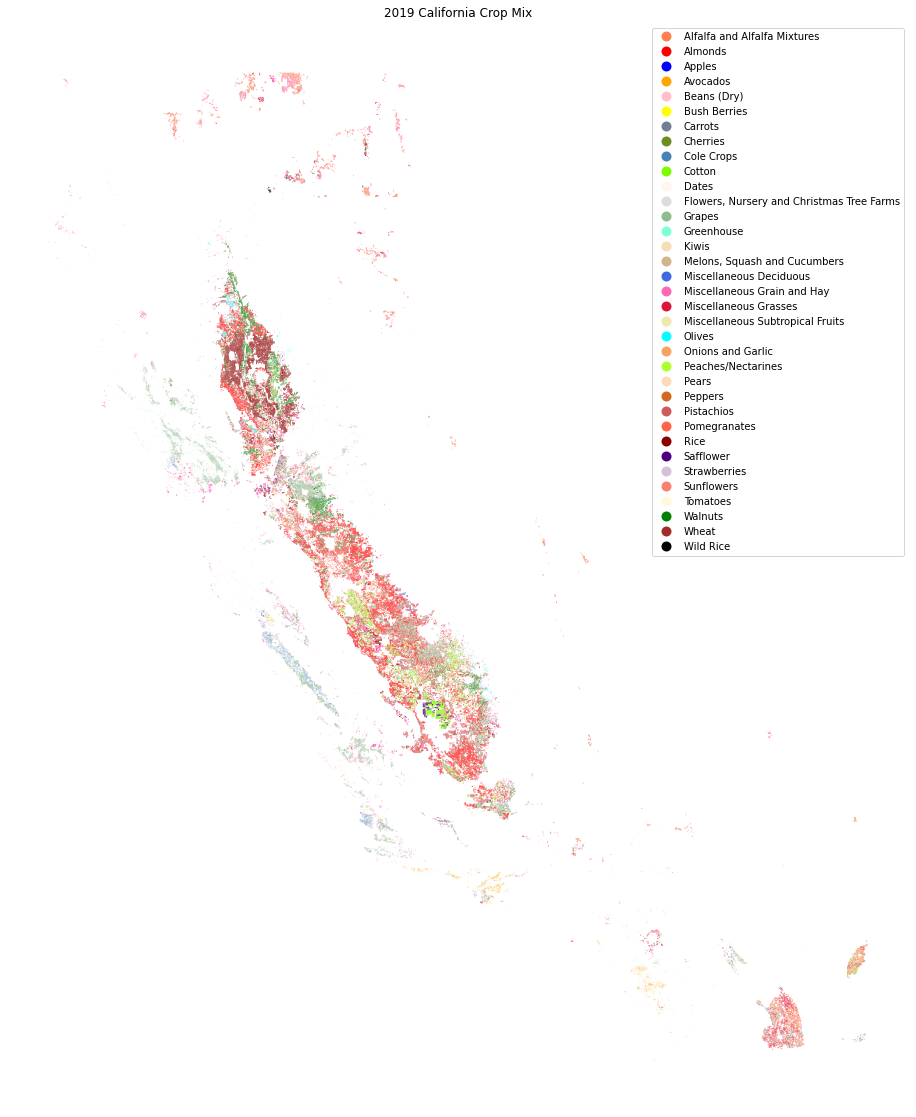

In [31]:
colors = ['coral', 'red', 'blue',
         'orange', 'pink', 'yellow',
        'slategray', 'dodgerblue','olivedrab', 
         'steelblue', 'lawngreen','seashell',
         'gainsboro', 'darkseagreen','aquamarine',
         'lemonchiffon', 'wheat','tan', 
         'royalblue', 'hotpink','crimson', 
         'palegoldenrod', 'cyan','linen', 
         'sandybrown', 'greenyellow','peachpuff', 
         'chocolate', 'indianred','tomato', 
         'darkred', 'firebrick', 'indigo', 
         'thistle','salmon', 'cornsilk',
         'green','brown','black']

# colors = {'Alfalfa and Alfalfa Mixtures':'coral', 'Almonds':'blue', 'Apples':'red',
#          'Avocados':'orange', 'Beans (Dry)':'pink', 'Bush Berries':'yellow',
#         'Carrots':'slategray', 'Cherries':'dodgerblue', 'Cole Crops':'olivedrab', 
#          'Cotton':'steelblue', 'Dates':'lawngreen', 'Flowers, Nursery and Christmas Tree Farms':'seashell',
#          'Grapes':'gainsboro', 'Greenhouse':'darkseagreen', 'Kiwis':'aquamarine',
#          'Melons, Squash and Cucumbers':'lemonchiffon', 'Micellaneous Deciduous':'wheat', 'Miscellaneous Grain and Hay':'tan', 
#          'Miscellaneous Grasses':'royalblue', 'Miscellaneous Subtropical Fruits':'hotpink', 'Olives':'crimson', 
#          'Onions and Garlic':'palegoldenrod', 'Peaches/Nectarines':'cyan', 'Pears':'linen', 
#          'Peppers':'sandybrown', 'Pistachios':'greenyellow', 'Pomegranates':'peachpuff', 
#          'Rice':'chocolate', 'Safflower':'indianred', 'Strawberries':'tomato', 
#          'Sunflowers':'darkred', 'Tomatoes':'firebrick', 'Urban':'indigo', 
#          'Walnuts':'thistle', 'Wheat':'salmon', 'Wild Rice':'black'}


df2019.plot(column='MAIN_CROP', categorical=True, legend=True, figsize=(20,20),
           cmap=matplotlib.colors.ListedColormap(colors))
plt.title("2019 California Crop Mix")
plt.axis('off')

(-13902400.2784, -12648165.787, 3753459.3223449974, 5228268.221754998)

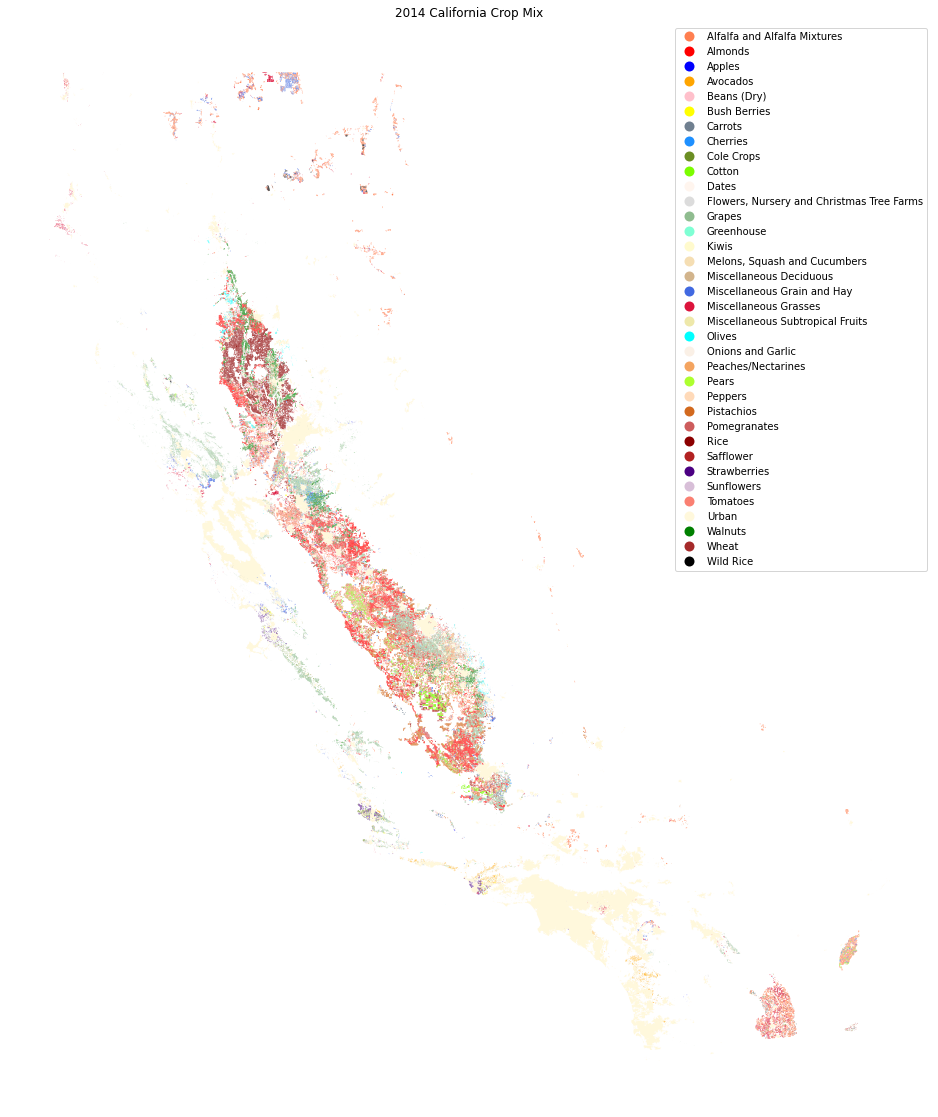

In [17]:
df2014.plot(column='Crop2014', categorical=True, legend=True, figsize=(20,20), 
            cmap=matplotlib.colors.ListedColormap(colors))
plt.title("2014 California Crop Mix")
plt.axis('off')

<AxesSubplot:xlabel='Crop2014'>

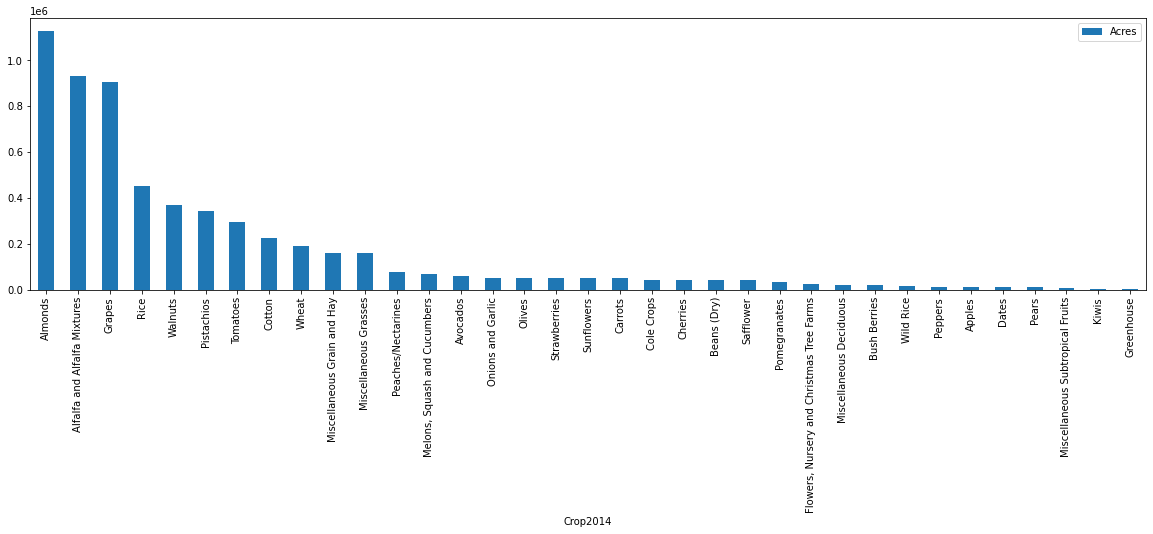

In [18]:
df2014 = df2014[df2014.Crop2014 != 'Urban']
crop_areas2014 = df2014[['Crop2014', 'Acres']].groupby('Crop2014').sum().sort_values('Acres', ascending=False)
crop_areas2014.plot.bar(figsize = (20,5))

<AxesSubplot:xlabel='MAIN_CROP'>

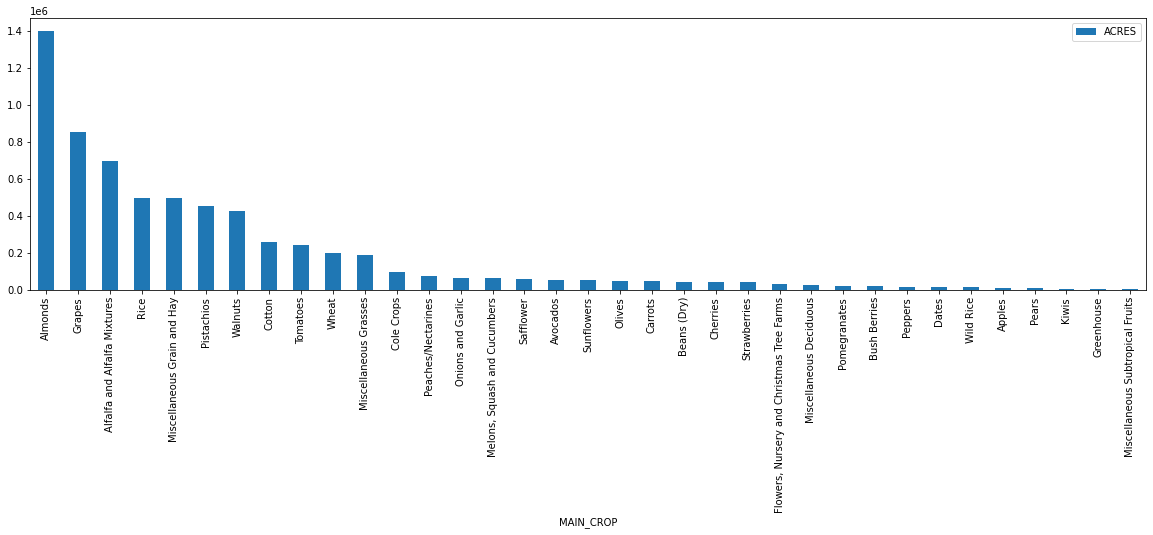

In [19]:
df2019 = df2019[df2019.MAIN_CROP != 'Urban']
crop_areas2019 = df2019[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum().sort_values('ACRES', ascending=False)
crop_areas2019.plot.bar(figsize = (20,5))

In [53]:
df_fresno_2019=df2019[df2019.COUNTY == "Fresno"]
df_fresno_2019

,OBJECTID,UniqueID,DWR_REVISE,SYMB_CLASS,MULTIUSE,CLASS1,SUBCLASS1,SPECOND1,IRR_TYP1PA,IRR_TYP1PB,...,EMRG_CROP,REGION,ACRES,COUNTY,LIQ_REPORT,MAIN_CROP,MAIN_CROP_,Shape__Are,Shape__Len,geometry
195238,195239,1027399,*,D,S,**,**,*,*,*,...,****,SCRO,22.061916,Fresno,D13 **** **** ****,Walnuts,NaN,139363.749540,1656.618808,"POLYGON Z ((-13433615.251 4405704.528 0.000, -..."
195239,195240,1027506,*,D,S,**,**,*,*,*,...,****,SCRO,8.826006,Fresno,D13 **** **** ****,Walnuts,NaN,55576.146852,943.239001,"POLYGON Z ((-13340790.818 4388246.261 0.000, -..."
195240,195241,1027510,*,D,S,**,**,*,*,*,...,****,SCRO,6.896737,Fresno,D13 **** **** ****,Walnuts,NaN,43568.828120,998.194492,"POLYGON Z ((-13434514.503 4406030.665 0.000, -..."
195241,195242,1027520,*,D,S,**,**,*,*,*,...,****,SCRO,2.098888,Fresno,D13 **** **** ****,Walnuts,NaN,13220.507666,666.714248,"POLYGON Z ((-13330637.180 4390016.899 0.000, -..."
195242,195243,1027487,*,X,S,**,**,*,*,*,...,****,SCRO,3.071160,Fresno,X **** **** ****,X,NaN,19399.984633,562.162752,"POLYGON Z ((-13341088.947 4405460.367 0.000, -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233337,233338,1037843,*,X,S,**,**,*,*,*,...,****,SCRO,39.607542,Fresno,X **** **** ****,X,NaN,248281.387507,2028.891038,"POLYGON Z ((-13397512.574 4363795.214 0.000, -..."
261874,261875,1038551,*,X,S,**,**,*,*,*,...,****,SCRO,3.147488,Fresno,X **** **** ****,X,NaN,19802.862716,632.592849,"POLYGON Z ((-13293751.556 4383935.465 0.000, -..."
261875,261876,1027669,*,X,S,**,**,*,*,*,...,****,SCRO,3.738158,Fresno,X **** **** ****,X,NaN,23519.128466,699.401761,"POLYGON Z ((-13293496.016 4383839.394 0.000, -..."
261877,261878,1038552,*,T,D,F,16,*,*,*,...,****,SCRO,32.367097,Fresno,F16 T18 **** ****,T18,260.0,203905.613787,1813.145707,"POLYGON Z ((-13413089.468 4390642.405 0.000, -..."


In [33]:
df_fresno_2014=df2014[df2014.County == "Fresno"]
df_fresno_2014

,OBJECTID,Crop2014,Acres,County,Comments,Source,Modified_B,Date_Data_,Last_Modif,DWR_Standa,Shape__Are,Shape__Len,geometry
3,4,Grapes,43.474109,Fresno,None,"Land IQ, LLC",Zhongwu Wang,"July, 2014",2017-05-07,V | VINEYARD,274749.750896,2256.858669,"POLYGON Z ((-13355020.096 4407864.075 0.000, -..."
7,8,Grapes,93.723265,Fresno,None,"Land IQ, LLC",Zhongwu Wang,"July, 2014",2017-05-07,V | VINEYARD,588559.373632,3207.406009,"POLYGON Z ((-13331506.862 4374173.298 0.000, -..."
21,22,Peaches/Nectarines,6.409884,Fresno,None,"Land IQ, LLC",Zhongwu Wang,"July, 2014",2017-05-07,D | DECIDUOUS FRUITS AND NUTS,40303.875291,899.340263,"POLYGON Z ((-13304207.158 4380620.872 0.000, -..."
39,40,Grapes,17.461519,Fresno,None,"Land IQ, LLC",Zhongwu Wang,"July, 2014",2017-05-07,V | VINEYARD,109801.912236,1746.082648,"POLYGON Z ((-13331417.480 4381217.468 0.000, -..."
66,67,Grapes,9.365854,Fresno,None,"Land IQ, LLC",Zhongwu Wang,"July, 2014",2017-05-07,V | VINEYARD,58923.149060,1242.202018,"POLYGON Z ((-13339076.403 4383454.620 0.000, -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360953,360954,Peaches/Nectarines,6.188231,Fresno,None,"Land IQ, LLC",Zhongwu Wang,"July, 2014",2017-05-07,D | DECIDUOUS FRUITS AND NUTS,38959.783717,846.850342,"POLYGON Z ((-13304396.275 4387521.120 0.000, -..."
360970,360971,Cotton,37.317974,Fresno,None,"Land IQ, LLC",Zhongwu Wang,"July, 2014",2017-05-07,F | FIELD CROPS,233592.401348,2430.769788,"POLYGON Z ((-13346288.259 4356541.974 0.000, -..."
360976,360977,Grapes,2.119449,Fresno,None,"Land IQ, LLC",Zhongwu Wang,"July, 2014",2017-05-07,V | VINEYARD,13341.106156,530.484342,"POLYGON Z ((-13334457.365 4386490.014 0.000, -..."
361012,361013,Almonds,7.063233,Fresno,None,"Land IQ, LLC",Zhongwu Wang,"July, 2014",2017-05-07,D | DECIDUOUS FRUITS AND NUTS,44515.457928,883.811186,"POLYGON Z ((-13341041.272 4393143.982 0.000, -..."


(-13453728.728085004, -13272692.935015, 4297533.607224996, 4452000.893274997)

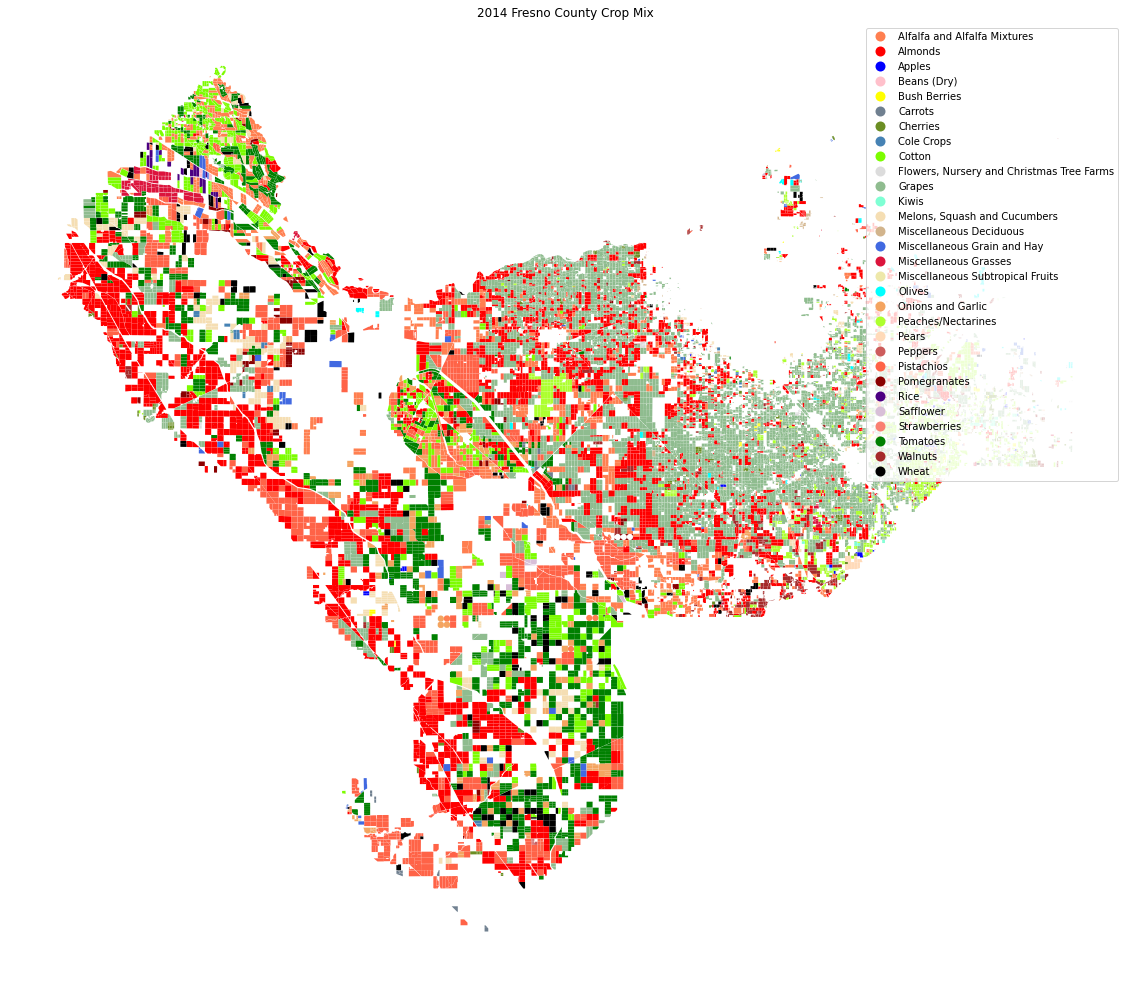

In [22]:
df_fresno_2014.plot(column='Crop2014', categorical=True, legend=True, figsize=(20,20), 
                   cmap=matplotlib.colors.ListedColormap(colors))
plt.title("2014 Fresno County Crop Mix")
plt.axis('off')

(-13453792.168295003, -13271392.174805, 4295469.396835003, 4452090.366065)

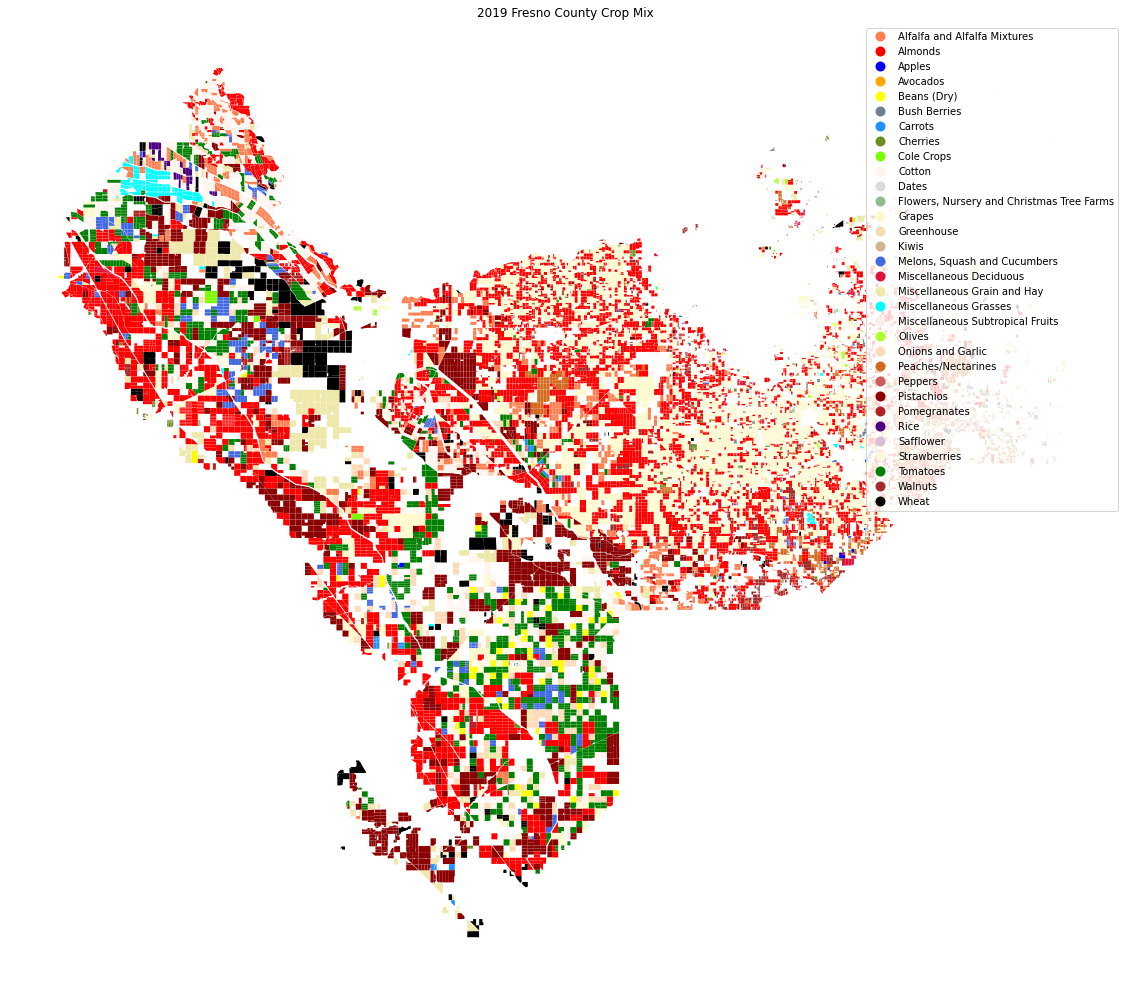

In [23]:
df_fresno_2019.plot(column='MAIN_CROP', categorical=True, legend=True, figsize=(20,20), 
                   cmap=matplotlib.colors.ListedColormap(colors))
plt.title("2019 Fresno County Crop Mix")
plt.axis('off')

<AxesSubplot:xlabel='Crop2014'>

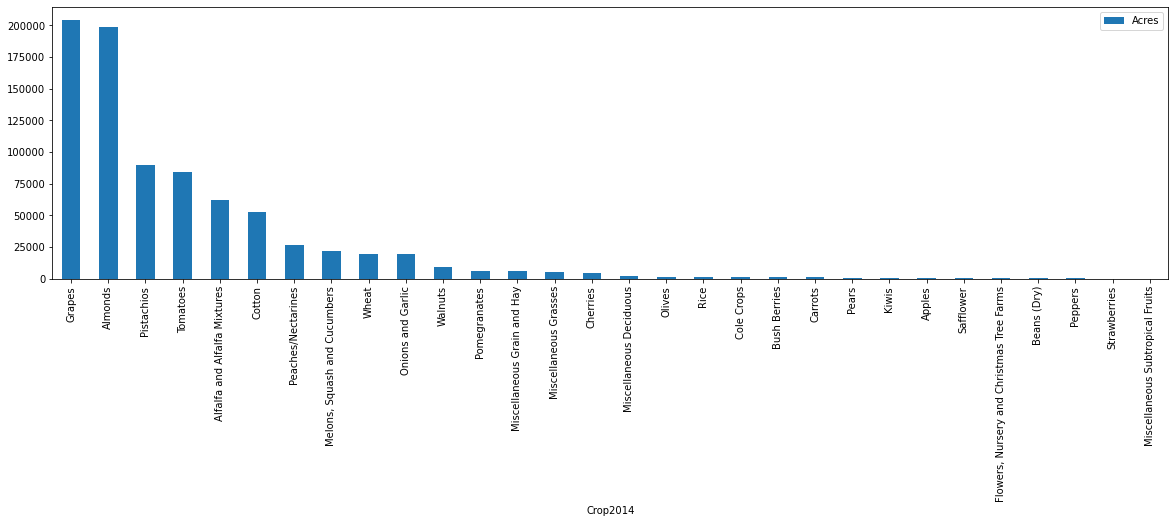

In [16]:
crop_acreage_fresno_2014 = df_fresno_2014[['Crop2014', 'Acres']].groupby('Crop2014').sum().sort_values('Acres', ascending=False)
crop_acreage_fresno_2014.plot.bar(figsize = (20,5))

<AxesSubplot:xlabel='MAIN_CROP'>

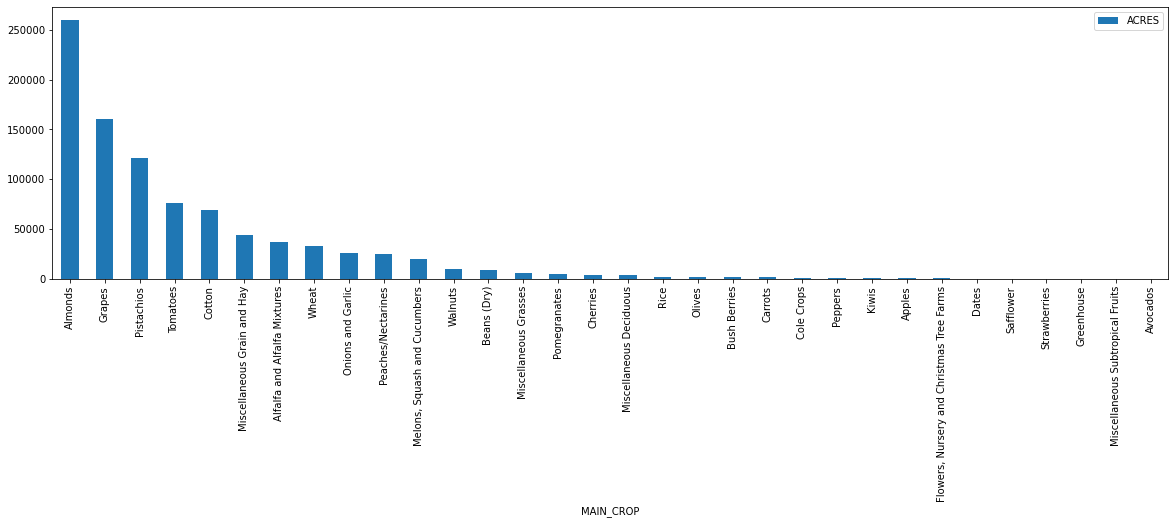

In [14]:
crop_acreage_fresno_2019 = df_fresno_2019[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum().sort_values('ACRES', ascending=False)
crop_acreage_fresno_2019.plot.bar(figsize = (20,5))

In [49]:
df_fresno_2014_almonds=df_fresno_2014[df_fresno_2014.Crop2014 == "Almonds"]

,OBJECTID,Crop2014,Acres,County,Comments,Source,Modified_B,Date_Data_,Last_Modif,DWR_Standa,Shape__Are,Shape__Len,geometry
79,80,Almonds,35.074071,Fresno,None,"Land IQ, LLC",Zhongwu Wang,"July, 2014",2017-05-07,D | DECIDUOUS FRUITS AND NUTS,2.217970e+05,2011.896326,"POLYGON Z ((-13376724.980 4411320.304 0.000, -..."
129,130,Almonds,17.627452,Fresno,None,"Land IQ, LLC",Zhongwu Wang,"July, 2014",2017-05-07,D | DECIDUOUS FRUITS AND NUTS,1.111224e+05,1442.159433,"POLYGON Z ((-13336067.767 4394306.685 0.000, -..."
135,136,Almonds,82.362716,Fresno,None,"Land IQ, LLC",Zhongwu Wang,"July, 2014",2017-05-07,D | DECIDUOUS FRUITS AND NUTS,5.184005e+05,3639.294318,"POLYGON Z ((-13387997.892 4386519.741 0.000, -..."
145,146,Almonds,79.439297,Fresno,None,"Land IQ, LLC",Zhongwu Wang,"July, 2014",2017-05-07,D | DECIDUOUS FRUITS AND NUTS,4.977842e+05,3001.758616,"POLYGON Z ((-13400021.166 4362274.164 0.000, -..."
178,179,Almonds,158.895764,Fresno,None,"Land IQ, LLC",Zhongwu Wang,"July, 2014",2017-05-07,D | DECIDUOUS FRUITS AND NUTS,1.000208e+06,3980.217450,"POLYGON Z ((-13410645.482 4387037.183 0.000, -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360372,360373,Almonds,74.480581,Fresno,None,"Land IQ, LLC",Zhongwu Wang,"July, 2014",2017-05-07,D | DECIDUOUS FRUITS AND NUTS,4.702305e+05,2889.056487,"POLYGON Z ((-13436551.344 4402421.046 0.000, -..."
360655,360656,Almonds,179.375884,Fresno,None,"Land IQ, LLC",Zhongwu Wang,"July, 2014",2017-05-07,D | DECIDUOUS FRUITS AND NUTS,1.118696e+06,4195.882768,"POLYGON Z ((-13364741.647 4335847.608 0.000, -..."
360683,360684,Almonds,14.383920,Fresno,None,"Land IQ, LLC",Zhongwu Wang,"July, 2014",2017-05-07,D | DECIDUOUS FRUITS AND NUTS,9.034131e+04,1458.948805,"POLYGON Z ((-13313732.422 4374397.810 0.000, -..."
360843,360844,Almonds,131.883335,Fresno,None,"Land IQ, LLC",Zhongwu Wang,"July, 2014",2017-05-07,D | DECIDUOUS FRUITS AND NUTS,8.220466e+05,3717.707912,"POLYGON Z ((-13379859.125 4333757.094 0.000, -..."


ValueError: 'matplotlib.colors.ListedColormap(colors)' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

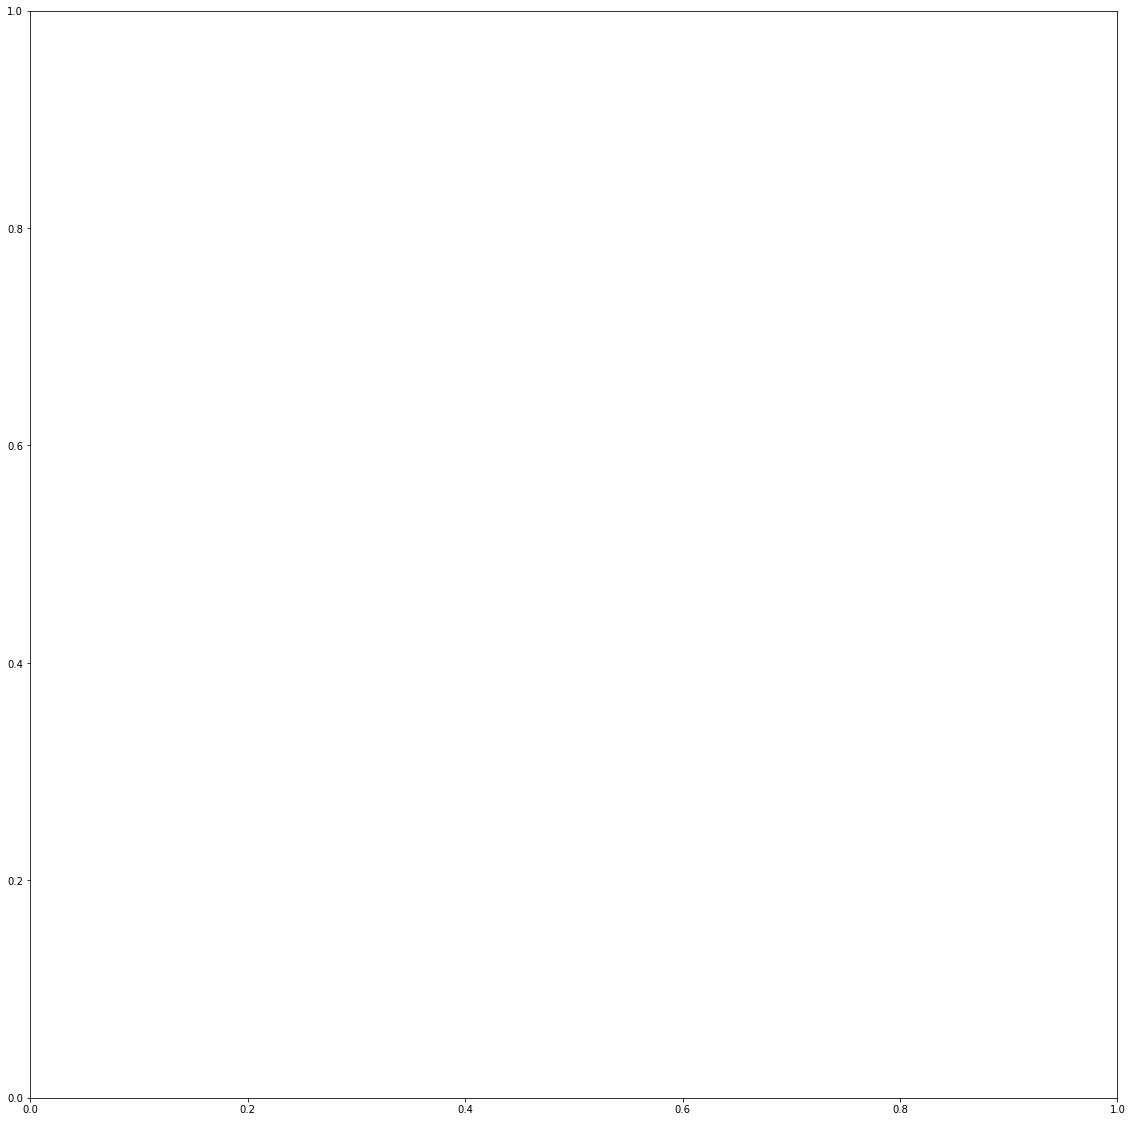

In [123]:
df_fresno_2014_almonds.plot(column='Crop2014', categorical=True, legend=True, figsize=(20,20), 
                   cmap='matplotlib.colors.ListedColormap(colors)')
plt.title("2014 Fresno County Almond Mix")
plt.axis('off')

In [54]:
df_fresno_2019_almonds=df_fresno_2019[df_fresno_2019.MAIN_CROP == "Almonds"]

,OBJECTID,UniqueID,DWR_REVISE,SYMB_CLASS,MULTIUSE,CLASS1,SUBCLASS1,SPECOND1,IRR_TYP1PA,IRR_TYP1PB,...,EMRG_CROP,REGION,ACRES,COUNTY,LIQ_REPORT,MAIN_CROP,MAIN_CROP_,Shape__Are,Shape__Len,geometry
195251,195252,1027369,r,D,S,**,**,*,*,*,...,****,SCRO,4.419834,Fresno,D12 **** **** ****,Almonds,NaN,27784.384447,864.773435,"POLYGON Z ((-13366707.937 4379136.873 0.000, -..."
195252,195253,1027370,r,D,S,**,**,*,*,*,...,****,SCRO,52.503590,Fresno,D12 **** **** ****,Almonds,NaN,331162.010897,2578.680233,"POLYGON Z ((-13421583.692 4397668.667 0.000, -..."
195253,195254,1027373,*,D,S,**,**,*,*,*,...,****,SCRO,17.214373,Fresno,D12 **** **** ****,Almonds,NaN,108470.593246,1456.628266,"POLYGON Z ((-13325923.426 4392310.278 0.000, -..."
195254,195255,1027379,*,D,S,**,**,*,*,*,...,****,SCRO,88.462540,Fresno,D12 **** **** ****,Almonds,NaN,559065.198398,4676.599084,"POLYGON Z ((-13443990.781 4408164.488 0.000, -..."
195255,195256,1027394,r,D,S,**,**,*,*,*,...,****,SCRO,2.540700,Fresno,D12 **** **** ****,Almonds,NaN,15955.748872,637.607460,"POLYGON Z ((-13326562.967 4373815.600 0.000, -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233175,233176,1038434,*,D,S,**,**,*,*,*,...,****,SCRO,12.292015,Fresno,D12 X **** ****,Almonds,NaN,77450.878658,1546.030516,"POLYGON Z ((-13352575.816 4391507.584 0.000, -..."
233176,233177,1038435,*,D,S,**,**,*,*,*,...,****,SCRO,5.656835,Fresno,D12 **** **** ****,Almonds,NaN,35628.710790,866.930086,"POLYGON Z ((-13343249.671 4389559.511 0.000, -..."
233178,233179,1038437,*,D,S,**,**,*,*,*,...,****,SCRO,12.859637,Fresno,D12 **** **** ****,Almonds,NaN,80989.533439,1302.527546,"POLYGON Z ((-13344024.587 4389390.797 0.000, -..."
233179,233180,1038438,*,D,S,**,**,*,*,*,...,****,SCRO,7.248334,Fresno,D12 **** **** ****,Almonds,NaN,45680.672040,916.071019,"POLYGON Z ((-13311574.653 4393115.735 0.000, -..."


(-13452998.95814, -13274817.234860003, 4305988.974620003, 4451277.130380001)

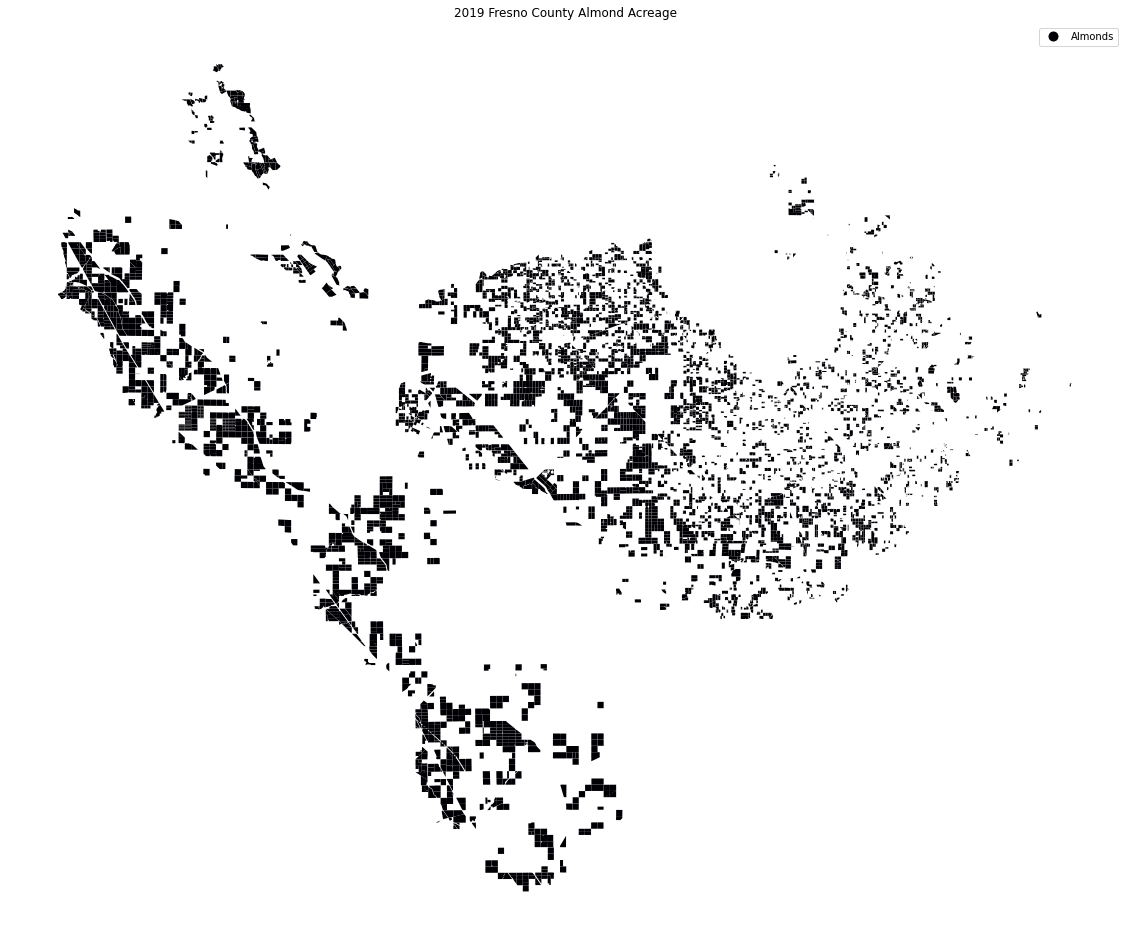

In [60]:
df_fresno_2019_almonds.plot(column='MAIN_CROP', categorical=True, legend=True, figsize=(20,20),
                           cmap='magma')
plt.title("2019 Fresno County Almond Acreage")
plt.axis('off')

(-13449376.333165003, -13272950.565735, 4309378.301144998, 4435826.839955)

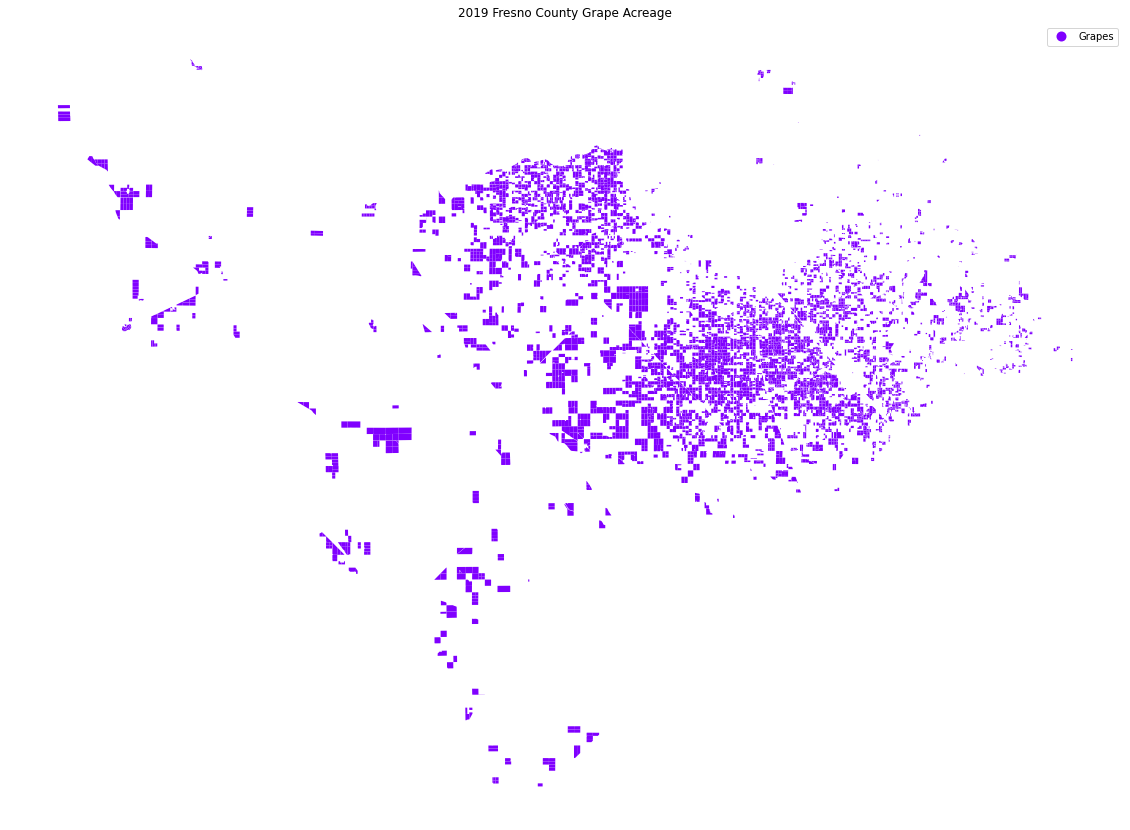

In [125]:
df_fresno_2019_grapes=df_fresno_2019[df_fresno_2019.MAIN_CROP == "Grapes"]
df_fresno_2019_grapes.plot(column='MAIN_CROP', categorical=True, legend=True, figsize=(20,20),
                           cmap='rainbow')
plt.title("2019 Fresno County Grape Acreage")
plt.axis('off')

In [174]:
df_fresno_2014_grapes=df_fresno_2014[df_fresno_2014.Crop2014 == "Grapes"]

(-13452528.975100001, -13275438.721099999, 4298969.727015, 4444152.918685)

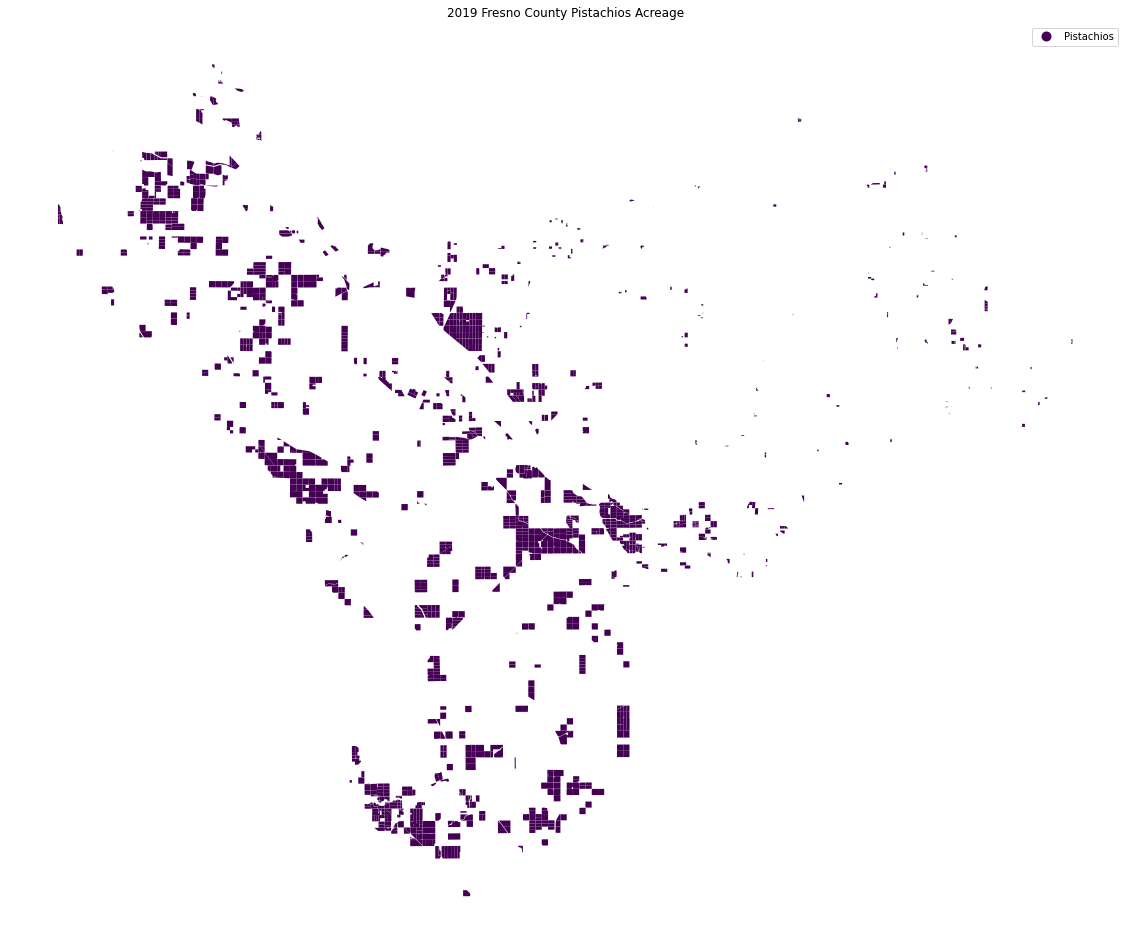

In [177]:
df_fresno_2019_pistachios=df_fresno_2019[df_fresno_2019.MAIN_CROP == "Pistachios"]
df_fresno_2014_pistachios=df_fresno_2014[df_fresno_2014.Crop2014 == "Pistachios"]
df_fresno_2019_pistachios.plot(column='MAIN_CROP', categorical=True, legend=True, figsize=(20,20),
                           cmap='viridis')
plt.title("2019 Fresno County Pistachios Acreage")
plt.axis('off')

(-13450480.694039999,
 -13293590.042760001,
 4306510.835104998,
 4448982.577594999)

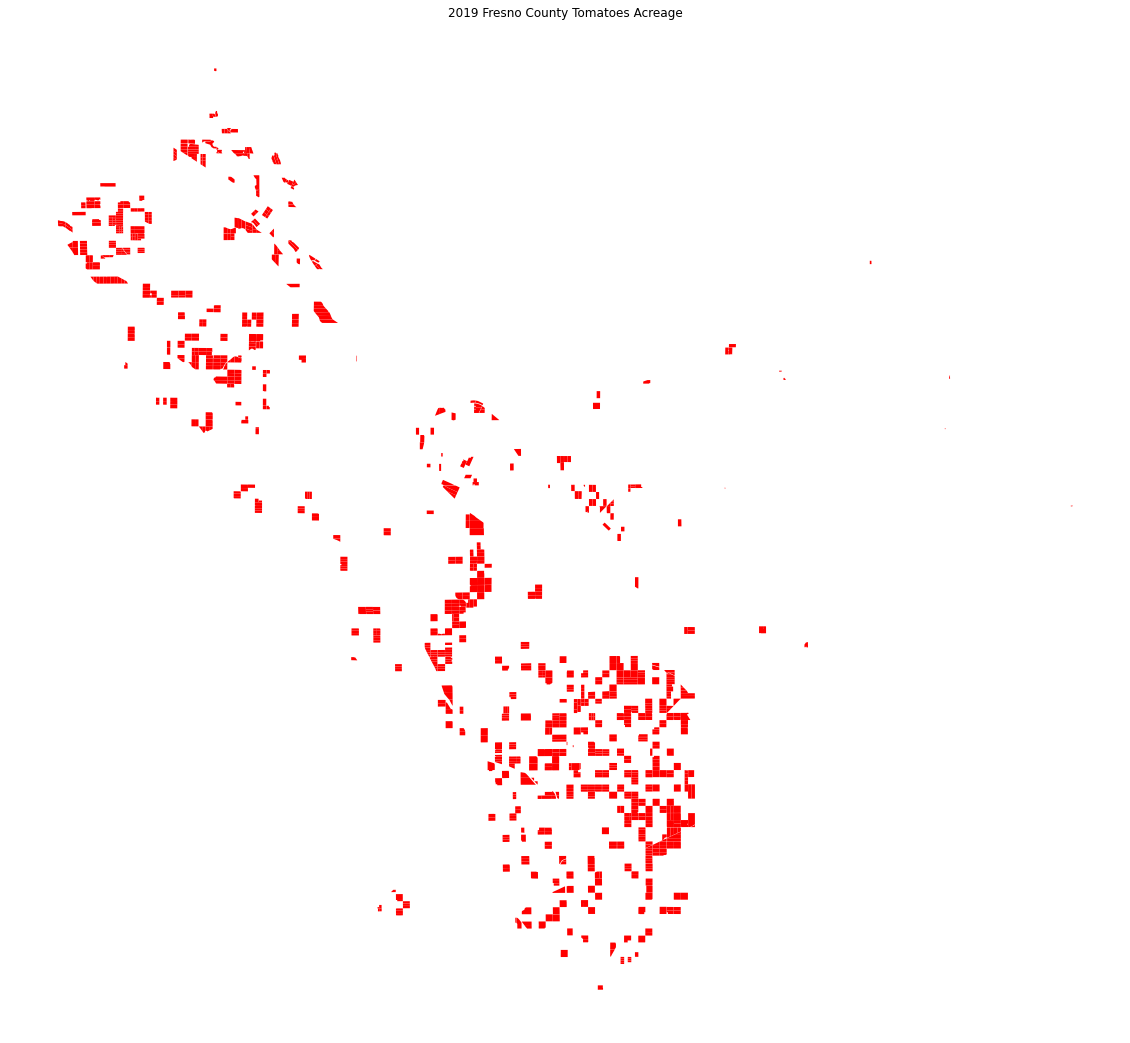

In [199]:
df_fresno_2019_tomatoes=df_fresno_2019[df_fresno_2019.MAIN_CROP == "Tomatoes"]
df_fresno_2014_tomatoes=df_fresno_2014[df_fresno_2014.Crop2014 == "Tomatoes"]

df_fresno_2019_tomatoes.plot(column='MAIN_CROP', categorical=True, legend=False, figsize=(20,20),
                           cmap='hsv')
plt.title("2019 Fresno County Tomatoes Acreage")
plt.axis('off')

(-13450540.213095002, -13312270.279205002, 4310118.257425004, 4451392.801275)

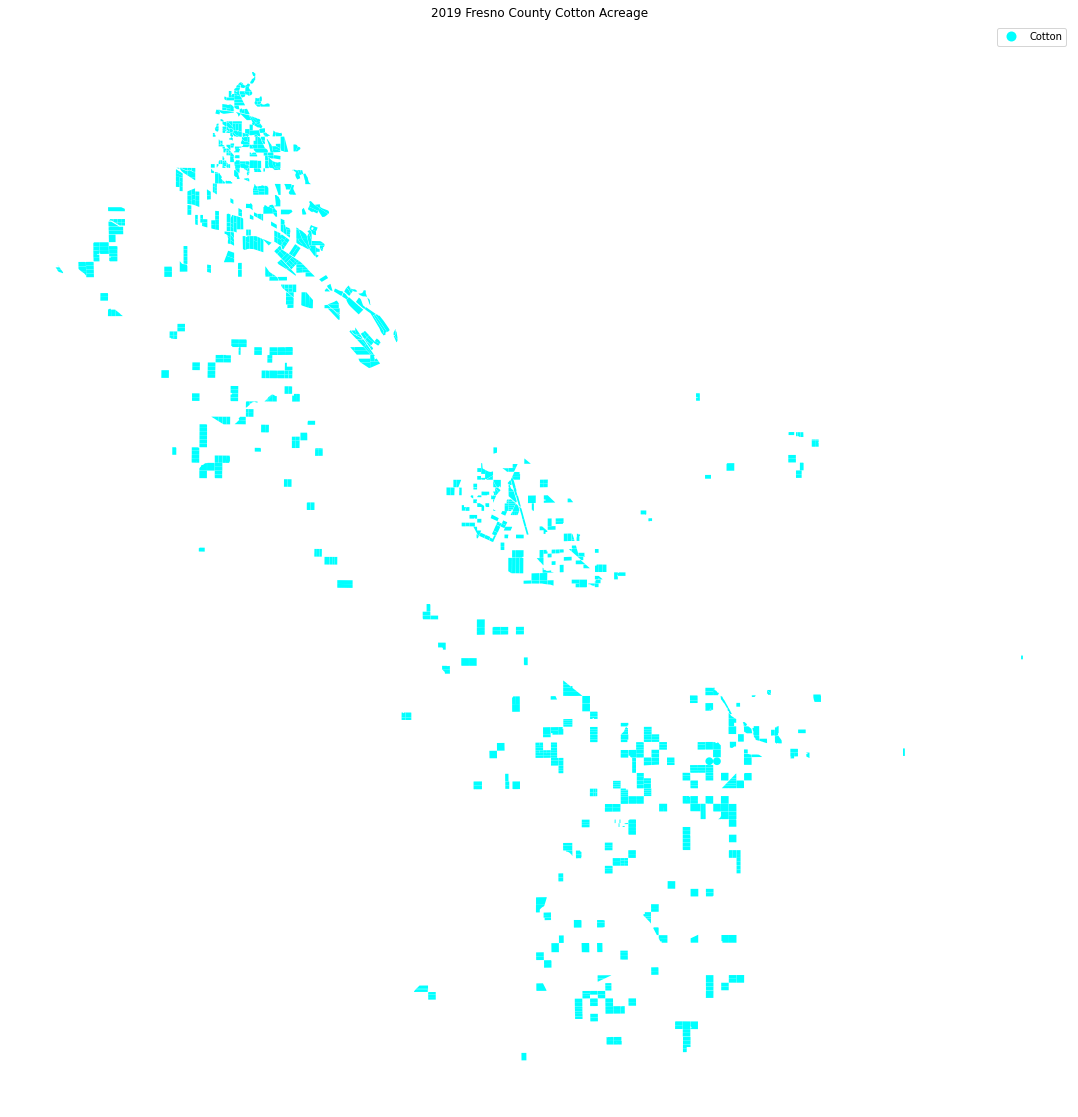

In [184]:
df_fresno_2019_cotton=df_fresno_2019[df_fresno_2019.MAIN_CROP == "Cotton"]
df_fresno_2014_cotton=df_fresno_2014[df_fresno_2014.Crop2014 == "Cotton"]

df_fresno_2019_cotton.plot(column='MAIN_CROP', categorical=True, legend=True, figsize=(20,20),
                           cmap='cool')
plt.title("2019 Fresno County Cotton Acreage")
plt.axis('off')

In [85]:
crop_acreage_fresno_2019_almonds = df_fresno_2019_almonds[['MAIN_CROP', 'ACRES']].groupby('MAIN_CROP').sum().sort_values('ACRES', ascending=False)
crop_acreage_fresno_2019_almonds['ACRES']


MAIN_CROP
Almonds    260078.471214
Name: ACRES, dtype: float64

In [106]:
crop_acreage_fresno_2014_almonds = df_fresno_2014_almonds[['Crop2014', 'Acres']].groupby('Crop2014').sum().sort_values('Acres', ascending=False)
crop_acreage_fresno_2014_almonds = crop_acreage_fresno_2014_almonds.astype(int)
crop_acreage_fresno_2014_almonds


,Acres
Crop2014,
Almonds,198733


In [102]:
crop_acreage_fresno_2014_almonds['Acres'] = crop_acreage_fresno_2014_almonds['Acres'].astype(int)
type(crop_acreage_fresno_2014_almonds)

pandas.core.frame.DataFrame

In [122]:
percent_change_almonds=100*(crop_acreage_fresno_2019_almonds['ACRES']-crop_acreage_fresno_2014_almonds['Acres'])/crop_acreage_fresno_2014_almonds['Acres']
percent_change_almonds

MAIN_CROP
Almonds    30.868286
dtype: float64

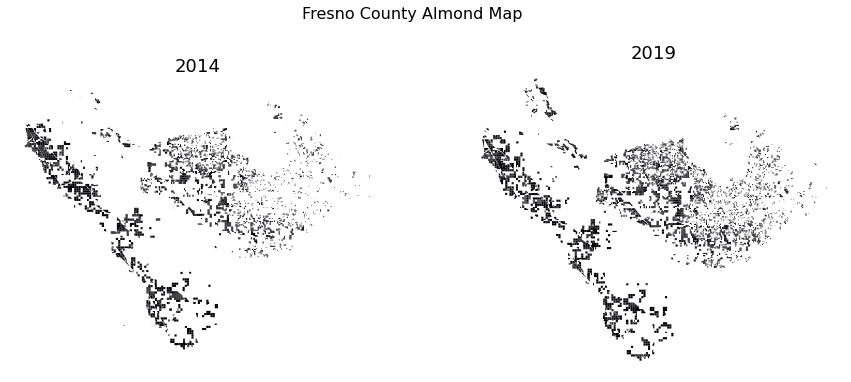

In [171]:
fig,ax = plt.subplots(1, 2, figsize=(15,15))
f1 = df_fresno_2014_almonds.plot(column='Crop2014',ax=ax[0], categorical=True,
                           cmap='magma')
f2 = df_fresno_2019_almonds.plot(column='MAIN_CROP',ax=ax[1], categorical=True,
                           cmap='magma')

ax[0].set_title('2014', fontsize=18)
ax[1].set_title('2019', fontsize=18)
ax[0].axis('off')
ax[1].axis('off')

plt.suptitle('Fresno County Almond Map', size=16, y=0.7);      
 
plt.show()


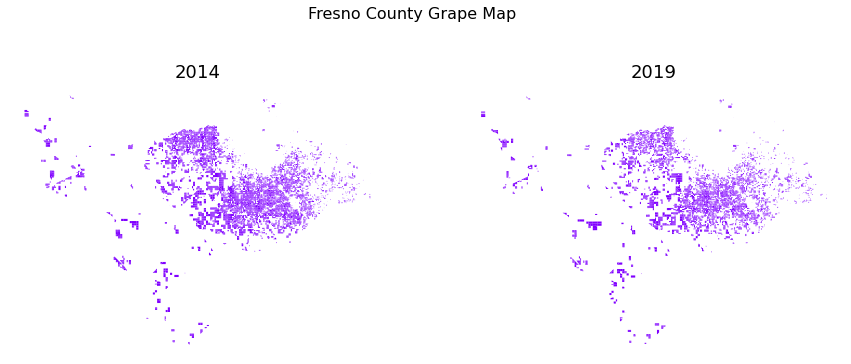

In [196]:
fig,ax = plt.subplots(1, 2, figsize=(15,15))
f1 = df_fresno_2014_grapes.plot(column='Crop2014',ax=ax[0], categorical=True,
                           cmap='rainbow')
f2 = df_fresno_2019_grapes.plot(column='MAIN_CROP',ax=ax[1], categorical=True,
                           cmap='rainbow')

ax[0].set_title('2014', fontsize=18)
ax[1].set_title('2019', fontsize=18)
ax[0].axis('off')
ax[1].axis('off')

plt.suptitle('Fresno County Grape Map', size=16, y=0.7);      
 
plt.show()

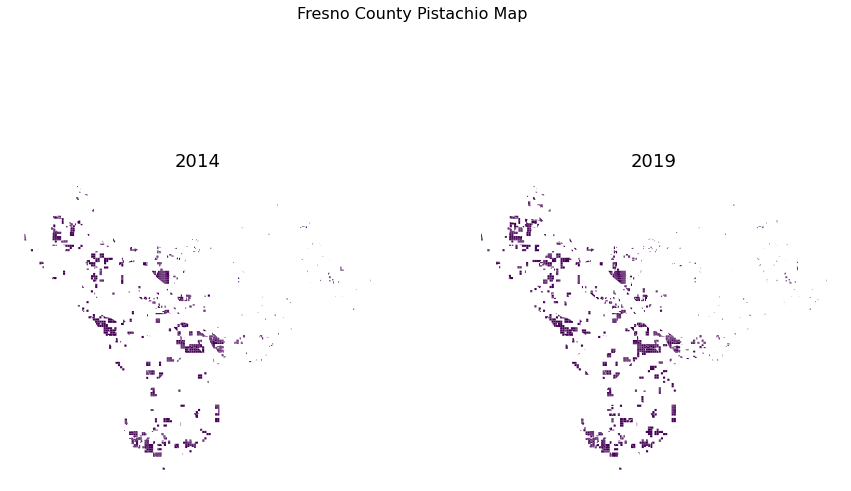

In [191]:
fig,ax = plt.subplots(1, 2, figsize=(15,15))
f1 = df_fresno_2014_pistachios.plot(column='Crop2014',ax=ax[0], categorical=True,
                           cmap='viridis')
f2 = df_fresno_2019_pistachios.plot(column='MAIN_CROP',ax=ax[1], categorical=True,
                           cmap='viridis')

ax[0].set_title('2014', fontsize=18)
ax[1].set_title('2019', fontsize=18)
ax[0].axis('off')
ax[1].axis('off')

plt.suptitle('Fresno County Pistachio Map', size=16, y=0.8);      
 
plt.show()

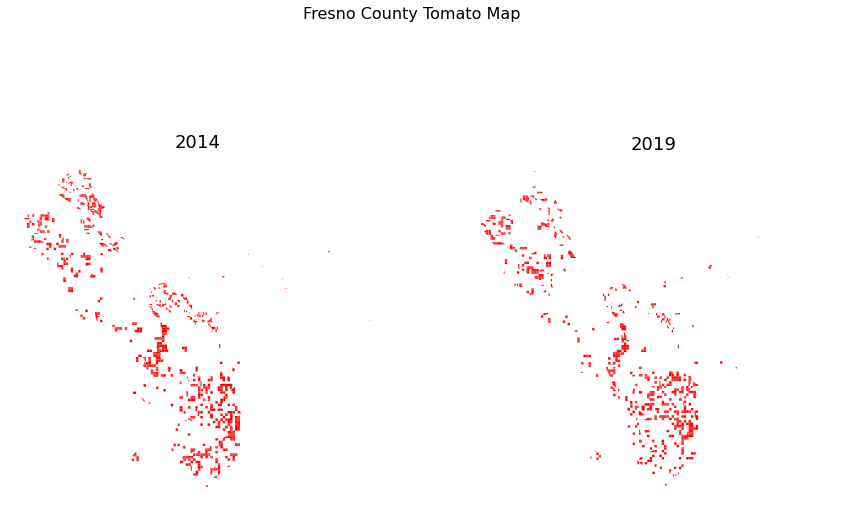

In [187]:
fig,ax = plt.subplots(1, 2, figsize=(15,15))
f1 = df_fresno_2014_tomatoes.plot(column='Crop2014',ax=ax[0], categorical=True,
                           cmap='hsv')
f2 = df_fresno_2019_tomatoes.plot(column='MAIN_CROP',ax=ax[1], categorical=True,
                           cmap='hsv')

ax[0].set_title('2014', fontsize=18)
ax[1].set_title('2019', fontsize=18)
ax[0].axis('off')
ax[1].axis('off')

plt.suptitle('Fresno County Tomato Map', size=16, y=0.8);      
 
plt.show()

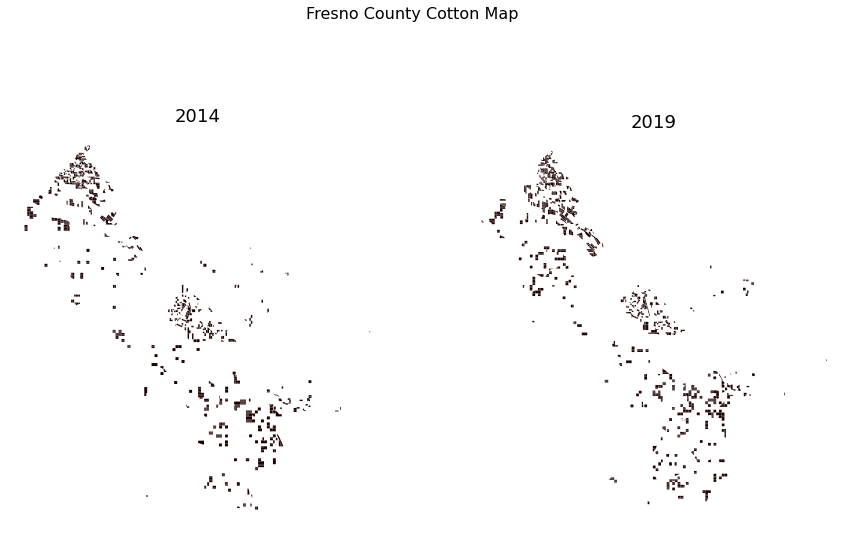

In [194]:
fig,ax = plt.subplots(1, 2, figsize=(15,15))
f1 = df_fresno_2014_cotton.plot(column='Crop2014',ax=ax[0], categorical=True,
                           cmap='pink')
f2 = df_fresno_2019_cotton.plot(column='MAIN_CROP',ax=ax[1], categorical=True,
                           cmap='pink')

ax[0].set_title('2014', fontsize=18)
ax[1].set_title('2019', fontsize=18)
ax[0].axis('off')
ax[1].axis('off')

plt.suptitle('Fresno County Cotton Map', size=16, y=0.8);      
 
plt.show()

In [198]:
df_fresno_2014_cotton.plot(column='Crop2014',ax=ax[0], categorical=True,
                           cmap='pink')
ax[0].set_title('2014', fontsize=18)
ax[0].axis('off')

plt.suptitle('Fresno County Cotton Map', size=16, y=0.8);      
 
plt.show()

<Figure size 432x288 with 0 Axes>

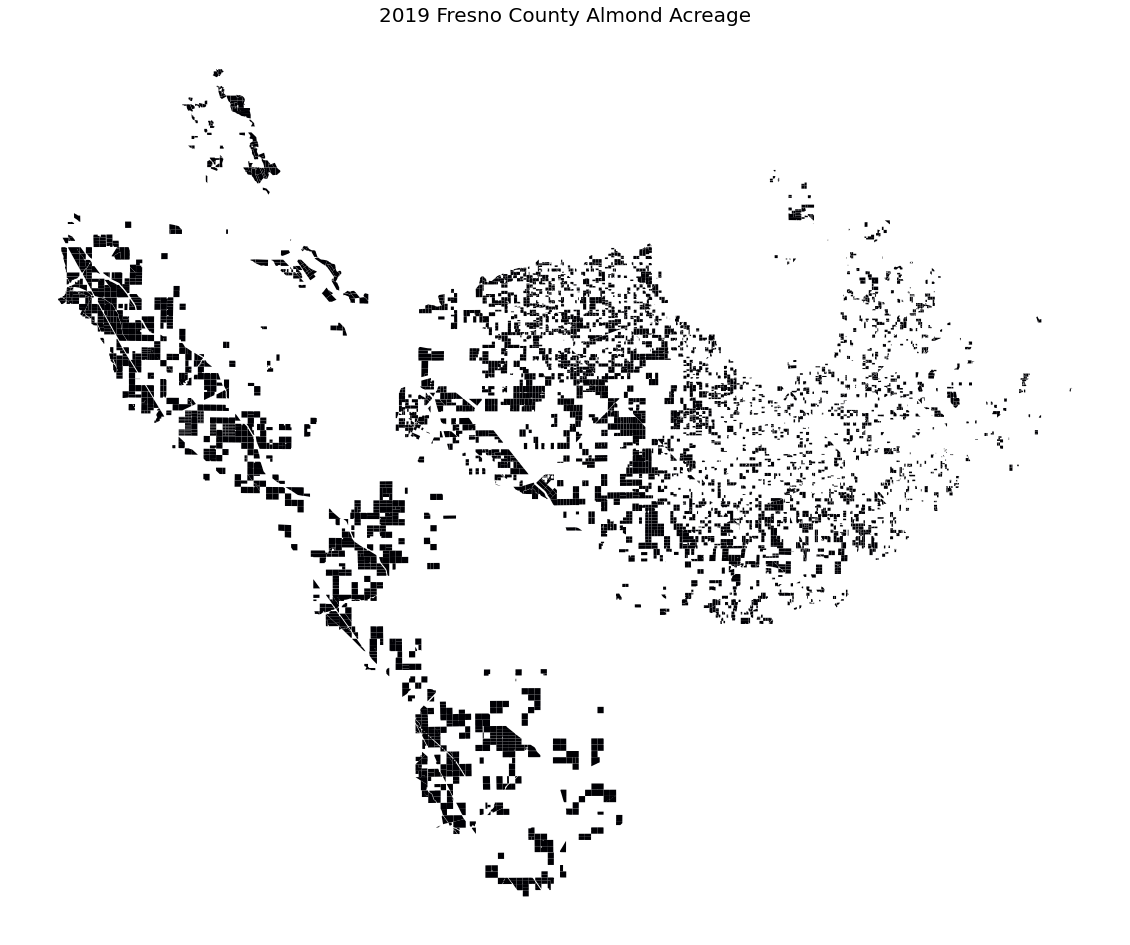

In [244]:
df_fresno_2019_almonds.plot(column='MAIN_CROP', categorical=True, legend=False, figsize=(20,20),
                           cmap='magma')
plt.title("2019 Fresno County Almond Acreage", fontsize=20)
plt.axis('off')
plt.savefig('/Users/MattWoolf/Desktop/almonds2019.png', dpi=100)

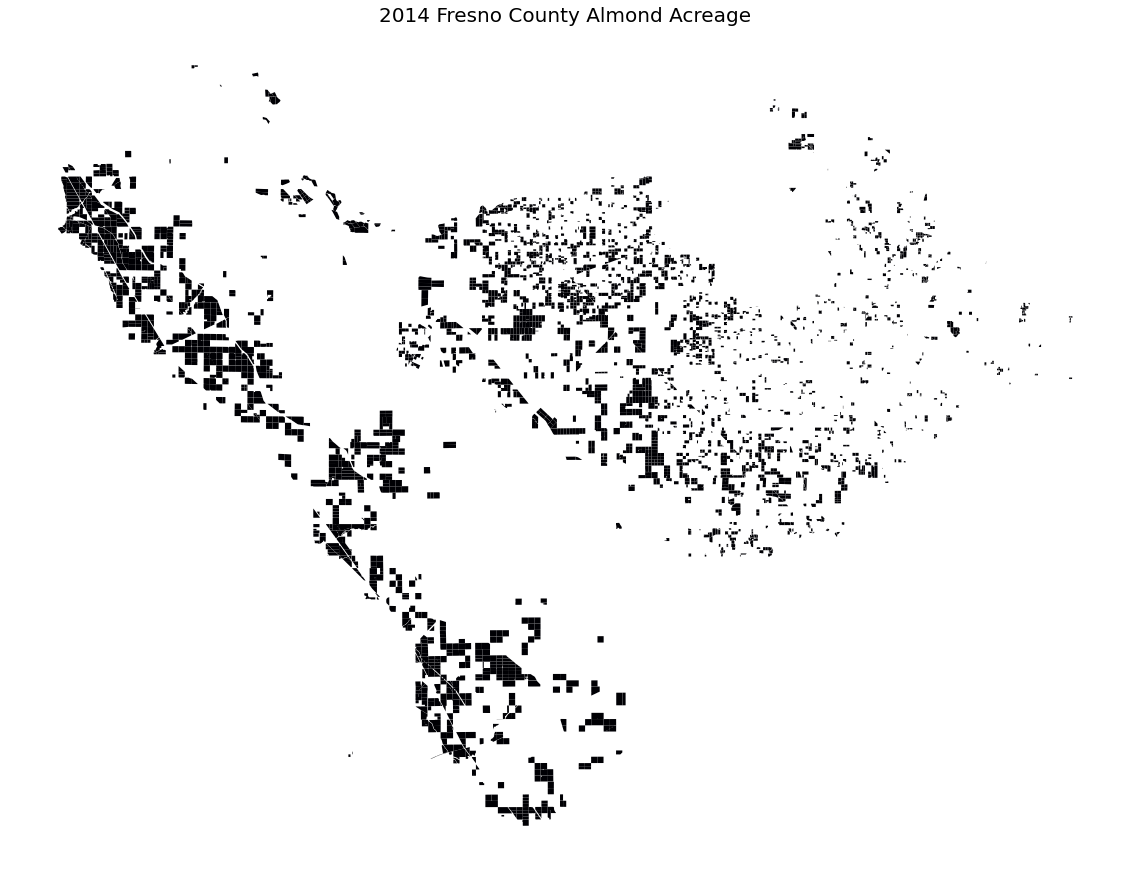

In [245]:
df_fresno_2014_almonds.plot(column='Crop2014', categorical=True, legend=False, figsize=(20,20),
                           cmap='magma')
plt.title("2014 Fresno County Almond Acreage", fontsize=20)
plt.axis('off')
plt.savefig('/Users/MattWoolf/Desktop/almonds2014.png', dpi=100)

In [227]:
 import imageio

In [246]:
png_list = ['/Users/MattWoolf/Desktop/almonds2014.png', 
            '/Users/MattWoolf/Desktop/almonds2019.png']
with imageio.get_writer('/Users/MattWoolf/Desktop/almonds.gif', mode='I', duration=3) as writer:
    for filename in png_list:
        image = imageio.imread(filename)
        writer.append_data(image)